<a href="https://colab.research.google.com/github/KatyaKatyaKatyaSSS/DKR-1/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7
## Анализ влияния факторов

Созина Екатерина ИСПк402

### Задание
1. Изучить теоретический материал (*см. вложенный .pdf файл, стр. 23 - 24*)
2. Выполнить задания из файла (*стр. 24*)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Уравнение регрессии: Y = 9.47 + 10.61 * X
Коэффициент детерминации R²: 0.978


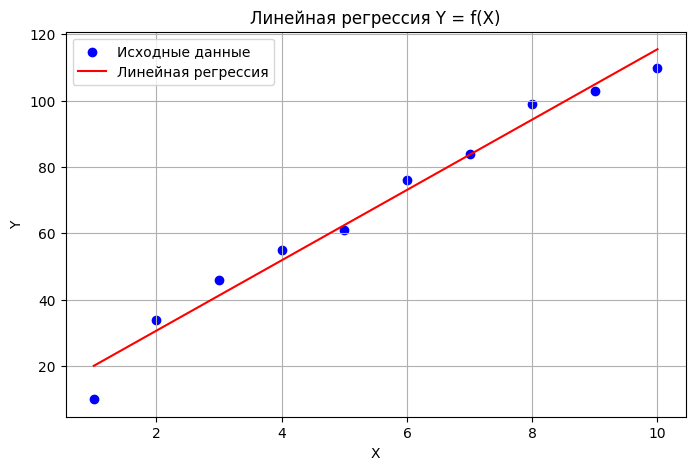

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Данные
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)  # Преобразуем в 2D массив
Y = np.array([10, 34, 46, 55, 61, 76, 84, 99, 103, 110])

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, Y)

# Коэффициенты регрессии
a = model.intercept_  # Свободный член
b = model.coef_[0]  # Коэффициент наклона

# Уравнение регрессии
print(f"Уравнение регрессии: Y = {a:.2f} + {b:.2f} * X")

# Предсказание значений
Y_pred = model.predict(X)

# Коэффициент детерминации R²
r2 = r2_score(Y, Y_pred)
print(f"Коэффициент детерминации R²: {r2:.3f}")

# Построение графика
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label="Исходные данные")  # Точки данных
plt.plot(X, Y_pred, color='red', label="Линейная регрессия")  # Линия регрессии
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Линейная регрессия Y = f(X)")
plt.legend()
plt.grid()
plt.show()


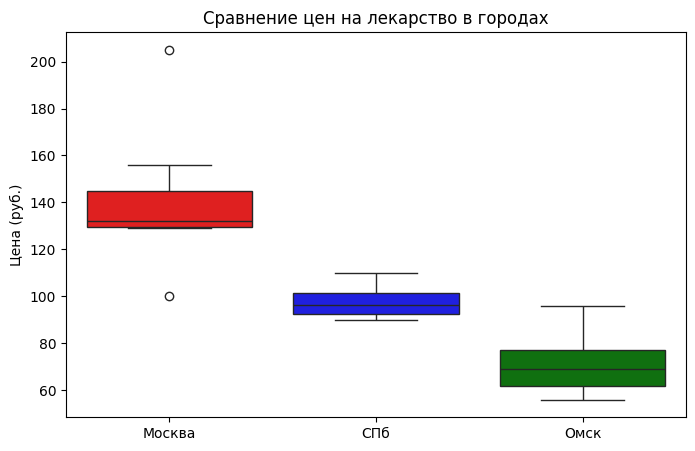

Критерий Манна-Уитни (Москва vs СПб): p-value = 0.0008
Критерий Краскела-Уоллиса (Москва, СПб, Омск): p-value = 0.0000
Гипотеза о равенстве средних цен отвергается. Различия значимы.
Самый выгодный город для покупки лекарства: Омск


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Данные (цены на лекарство в аптеках Москвы, Санкт-Петербурга и Омска)
X = np.array([100, 129, 205, 134, 0, 130, 156, 130, 141])  # Москва
Y = np.array([98, 110, 102, 96, 97, 93, 101, 90, -110, 91, 94, 105, 90])  # СПб
Z = np.array([56, 78, 96, 76, 69, 89, 61, 63, 60, 71, 68])  # Омск

# 2. Анализ выбросов (удалим отрицательные и нулевые цены)
def clean_data(arr):
    return arr[(arr > 0)]  # Оставляем только положительные значения

X = clean_data(X)
Y = clean_data(Y)
Z = clean_data(Z)

# 3. Визуализация цен
plt.figure(figsize=(8, 5))
sns.boxplot(data=[X, Y, Z], palette=["red", "blue", "green"])
plt.xticks([0, 1, 2], ["Москва", "СПб", "Омск"])
plt.ylabel("Цена (руб.)")
plt.title("Сравнение цен на лекарство в городах")
plt.show()

# 4. Сравнение двух городов: Манна-Уитни (Москва vs СПб)
U_stat, p_value_mw = stats.mannwhitneyu(X, Y, alternative='two-sided')
print(f"Критерий Манна-Уитни (Москва vs СПб): p-value = {p_value_mw:.4f}")

# 5. Сравнение всех трёх городов: Краскела-Уоллиса
H_stat, p_value_kw = stats.kruskal(X, Y, Z)
print(f"Критерий Краскела-Уоллиса (Москва, СПб, Омск): p-value = {p_value_kw:.4f}")

# 6. Вывод результатов
alpha = 0.05  # Уровень значимости

if p_value_kw < alpha:
    print("Гипотеза о равенстве средних цен отвергается. Различия значимы.")
else:
    print("Нет оснований утверждать, что цены в городах различаются.")

# Определяем, где дешевле всего
mean_prices = {"Москва": np.mean(X), "СПб": np.mean(Y), "Омск": np.mean(Z)}
cheapest_city = min(mean_prices, key=mean_prices.get)
print(f"Самый выгодный город для покупки лекарства: {cheapest_city}")


# **Интерпретация результатов**
Если p-value < 0.05, значит цены статистически различны

Город с самой низкой средней ценой — лучший для покупки лекарства